In [1]:
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
num_steps = 100
num_repetitions = 10000
num_experiments = 100

In [5]:
p_values = zeros(num_experiments)
t_stats = zeros(num_experiments)

mins = zeros(num_experiments)
maxs = zeros(num_experiments)
averages = zeros(num_experiments)

minimum_p = 1000
maximum_p = -1000
minimum_p_array = zeros(num_repetitions)
maximum_p_array = zeros(num_repetitions)

for k in range(num_experiments):
    final_positions = zeros(num_repetitions)
    for i in range(num_repetitions):
        x = 0
        for j in range(num_steps):
            mu, sigma = 0, 0.05
            my_step = random.normal(mu, sigma)
            x = x + my_step;
        final_positions[i] = x
    mu_expected = 0
    mu_observed = mean(final_positions)
    s = std(final_positions)
    n = len(final_positions)
    t_stat = (mu_observed - mu_expected)/(s/sqrt(n))
    p_values[k] = stats.t.sf(abs(t_stat), n-1) + (1 - stats.t.sf(-abs(t_stat), n-1))

    mins[k] = min(p_values[:k+1])
    maxs[k] = max(p_values[:k+1])
    averages[k] = mean(p_values[:k+1])
    
    if p_values[k] < minimum_p:
        minimum_p = p_values[k]
        minimum_p_array = final_positions
    elif p_values[k] > maximum_p:
        maximum_p = p_values[k]
        maximum_p_array = final_positions

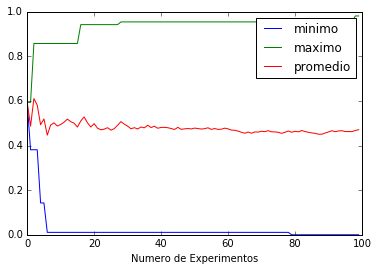

In [6]:
plot(mins)
plot(maxs)
plot(averages)
xlabel('Numero de Experimentos')
plt.legend(['minimo', 'maximo', 'promedio'], loc='upper right')

minimum p 0.000128906840898
mean 0.0614939146319
s 0.505935174568


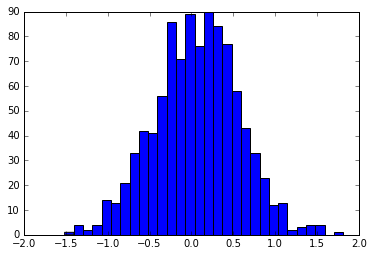

In [9]:
hist(minimum_p_array, bins=30)
print('minimum p ' + str(minimum_p))
print('mean ' + str(mean(minimum_p_array)))
print('s ' + str(std(minimum_p_array)))

maximum p 0.980522213367
mean 0.000382048295308
s 0.494728391535


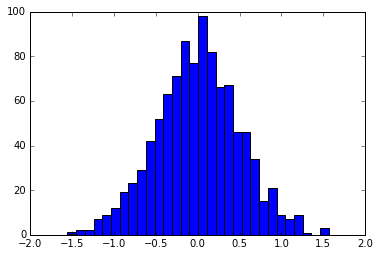

In [11]:
hist(maximum_p_array, bins=30)
print('maximum p ' + str(maximum_p))
print('mean ' + str(mean(maximum_p_array)))
print('s ' + str(std(maximum_p_array)))